## Points of Dispense Analysis

##### Maxwell Kennady, Nora Murray, Elizabeth Speigle

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [68]:
distances = pd.read_csv('data/OD_Pairs_Distances.csv')
population = pd.read_excel('data/BG_master.xlsx')
bg_included = pd.read_csv('data/bg_pop_included.csv')

In [69]:
dist_miles = distances.pivot(index='block_group', columns='pod_id', values='Miles')

In [70]:
dist = dist_miles.values
N = population['population'].values

In [71]:
infile = open('pods_open_total','rb')
pods_total = pickle.load(infile)
infile.close()

In [72]:
infile = open('pods_open_minmax','rb')
pods_minmax = pickle.load(infile)
infile.close()

In [73]:
infile = open('pods_flood_total','rb')
pods_flood_total = pickle.load(infile)
infile.close()

In [74]:
infile = open('pods_flood_minmax','rb')
pods_flood_minmax = pickle.load(infile)
infile.close()

### Comparing average and maximum distance by PODs opened

In [75]:
dist_compare = {'num_pods':[],
                'max_dist_total':[],
                'max_dist_minmax':[],
                'avg_dist_total':[],
                'avg_dist_minmax':[]}

for k in pods_total.keys():
    dist_compare['num_pods'].append(k)
    
    # Minimize total distance
    total_list = [N[j] * [dist[j,i]] for [j,i] in pods_total[k]]
    total_list_flat = [item for sublist in total_list for item in sublist]
    avg_total = sum(total_list_flat)/len(total_list_flat)
    max_total = max(total_list_flat)
    
    # Minimize maximum distance
    minmax_list = [N[j] * [dist[j,i]] for [j,i] in pods_minmax[k]]
    minmax_list_flat = [item for sublist in minmax_list for item in sublist]
    avg_minmax = sum(minmax_list_flat)/len(minmax_list_flat)
    max_minmax = max(minmax_list_flat)
    
    dist_compare['max_dist_total'].append(max_total)
    dist_compare['max_dist_minmax'].append(max_minmax)
    dist_compare['avg_dist_total'].append(avg_total)
    dist_compare['avg_dist_minmax'].append(avg_minmax)

In [76]:
dist_df = pd.DataFrame(dist_compare)

In [77]:
dist_df.head()

,num_pods,max_dist_total,max_dist_minmax,avg_dist_total,avg_dist_minmax
0,10,11.980543,9.035404,4.079687,4.997015
1,11,11.980543,8.611634,3.925553,5.492062
2,12,11.980543,8.502998,3.771784,4.842447
3,13,11.980543,8.035054,3.627613,4.876027
4,14,11.980543,7.951104,3.485437,4.552515


In [78]:
cols = ['max_dist_total','max_dist_minmax','avg_dist_total','avg_dist_minmax']

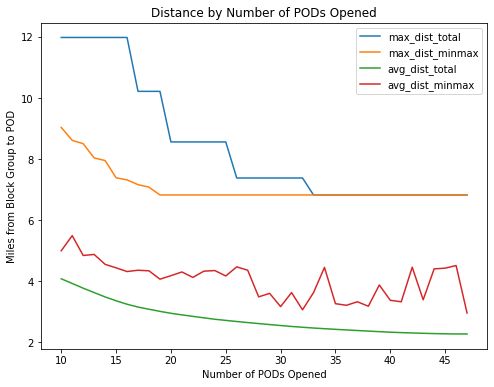

In [86]:
plt.figure(figsize=(8,6))
plt.plot(dist_df['num_pods'], dist_df[cols])
plt.title('Distance by Number of PODs Opened')
plt.ylabel('Miles from Block Group to POD')
plt.xlabel('Number of PODs Opened')
plt.legend(cols)
plt.show()

In [33]:
cols = ['max_dist_total','avg_dist_total']

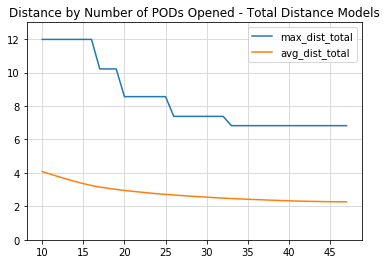

In [35]:
plt.plot(dist_df['num_pods'], dist_df[cols])
plt.title('Distance by Number of PODs Opened - Total Distance Models')
plt.legend(cols)
plt.grid(b=True, which='major', color='#D3D3D3', linestyle='-')
plt.ylim(0, 13)
plt.show()

In [36]:
cols = ['max_dist_minmax','avg_dist_minmax']

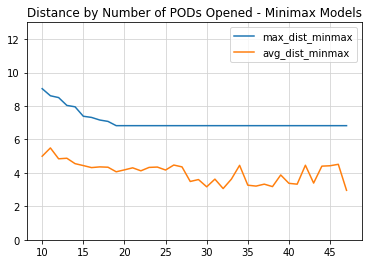

In [37]:
plt.plot(dist_df['num_pods'], dist_df[cols])
plt.title('Distance by Number of PODs Opened - Minimax Models')
plt.legend(cols)
plt.grid(b=True, which='major', color='#D3D3D3', linestyle='-')
plt.ylim(0, 13)
plt.show()

Flood Scenario

In [80]:
dist_flood_compare = {'num_pods':[],
                'max_dist_total':[],
                'max_dist_minmax':[],
                'avg_dist_total':[],
                'avg_dist_minmax':[]}

for k in pods_flood_total.keys():
    dist_flood_compare['num_pods'].append(k)
    
    # Minimize total distance
    total_list = [N[j] * [dist[j,i]] for [j,i] in pods_flood_total[k]]
    total_list_flat = [item for sublist in total_list for item in sublist]
    avg_total = sum(total_list_flat)/len(total_list_flat)
    max_total = max(total_list_flat)
    
    # Minimize maximum distance
    minmax_list = [N[j] * [dist[j,i]] for [j,i] in pods_flood_minmax[k]]
    minmax_list_flat = [item for sublist in minmax_list for item in sublist]
    avg_minmax = sum(minmax_list_flat)/len(minmax_list_flat)
    max_minmax = max(minmax_list_flat)
    
    dist_flood_compare['max_dist_total'].append(max_total)
    dist_flood_compare['max_dist_minmax'].append(max_minmax)
    dist_flood_compare['avg_dist_total'].append(avg_total)
    dist_flood_compare['avg_dist_minmax'].append(avg_minmax)

In [81]:
dist_flood_df = pd.DataFrame(dist_flood_compare)

In [82]:
dist_flood_df.head()

,num_pods,max_dist_total,max_dist_minmax,avg_dist_total,avg_dist_minmax
0,1,20.807948,21.983949,6.232089,13.252440
1,2,20.807948,19.277980,4.583169,14.177672
2,3,20.438668,14.550268,3.526891,6.140711
3,4,10.227140,14.474912,3.082898,9.944222
4,5,7.075253,11.145331,2.672649,6.753325


In [83]:
cols = ['max_dist_total','max_dist_minmax','avg_dist_total','avg_dist_minmax']

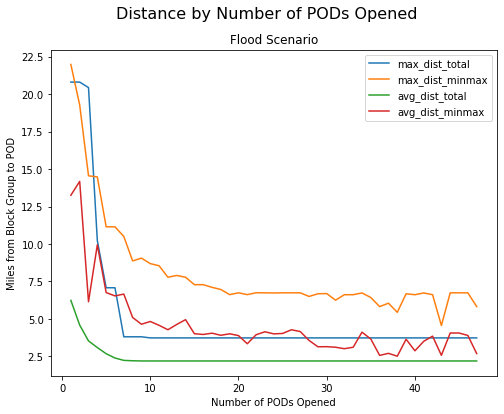

In [88]:
plt.figure(figsize=(8,6))
plt.plot(dist_flood_df['num_pods'], dist_flood_df[cols])
plt.suptitle('Distance by Number of PODs Opened', size=16)
plt.title('Flood Scenario')
plt.ylabel('Miles from Block Group to POD')
plt.xlabel('Number of PODs Opened')
plt.legend(cols)
plt.show()

### Histograms

Opening 20 PODs:

In [23]:
dist_min_total = [N[j] * [dist[j,i]] for [j,i] in pods_total[20]]
dist_min_total_flat = [item for sublist in dist_min_total for item in sublist]

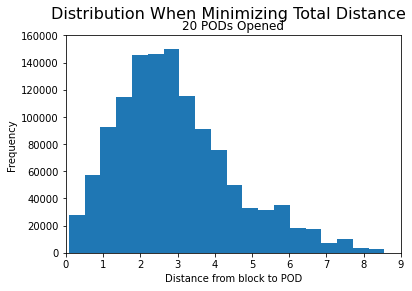

In [30]:
plt.hist(dist_min_total_flat, bins=20)
plt.suptitle('Distribution When Minimizing Total Distance', size=16)
plt.title('20 PODs Opened')
plt.xlabel('Distance from block to POD')
plt.ylabel('Frequency')
plt.xlim(0, 9)
plt.ylim(0, 160000)
plt.show()

In [31]:
dist_min_minmax = [N[j] * [dist[j,i]] for [j,i] in pods_minmax[20]]
dist_min_minmax_flat = [item for sublist in dist_min_minmax for item in sublist]

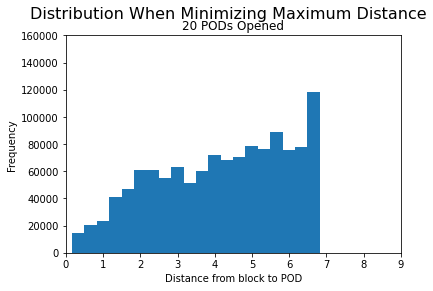

In [32]:
plt.hist(dist_min_minmax_flat, bins=20)
plt.suptitle('Distribution When Minimizing Maximum Distance', size=16)
plt.title('20 PODs Opened')
plt.xlabel('Distance from block to POD')
plt.ylabel('Frequency')
plt.xlim(0, 9)
plt.ylim(0, 160000)
plt.show()

### Top PODs

Histogram of the number of times each POD is selected in the solutions

Minimize total distance

In [47]:
pods_count_total = dict.fromkeys(range(48), 0)

In [49]:
for key, value in pods_total.items():
    pod_add = set()
    for bg, pod in value:
        pod_add.add(pod)
    for p in pod_add:
        pods_count_total[p] += 1

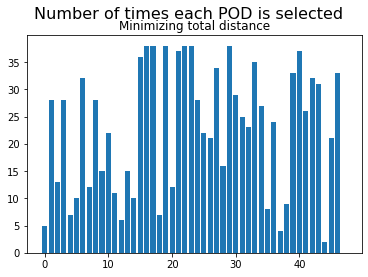

In [64]:
pod_list = []
value_list = []
for k, v in pods_count_total.items():
    pod_list.append(k)
    value_list.append(v)

plt.bar(pod_list, value_list)
plt.suptitle('Number of times each POD is selected', size=16)
plt.title('Minimizing total distance')
plt.show()

Minimize maximum distance

In [52]:
pods_count_minmax = dict.fromkeys(range(48), 0)

In [53]:
for key, value in pods_minmax.items():
    pod_add = set()
    for bg, pod in value:
        pod_add.add(pod)
    for p in pod_add:
        pods_count_minmax[p] += 1

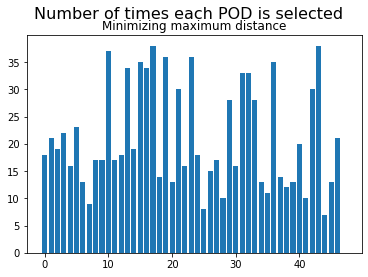

In [65]:
pod_list = []
value_list = []
for k, v in pods_count_minmax.items():
    pod_list.append(k)
    value_list.append(v)

plt.bar(pod_list, value_list)
plt.suptitle('Number of times each POD is selected', size=16)
plt.title('Minimizing maximum distance')
plt.show()

### Population

In [86]:
population.head()

,bg_id,census_geo_id,statefp,countyfp,tractce,blkgrpce,latitude,longitude,population,num_hhs,hh_no_car,hh_car
0,1,1500000US420030103001,42,3,10300,1,40.434602,-79.993347,2510,0,0,0
1,2,1500000US420030103002,42,3,10300,2,40.436130,-79.990873,3412,0,0,0
2,3,1500000US420030103003,42,3,10300,3,40.437007,-79.982553,347,141,39,102
3,4,1500000US420030103004,42,3,10300,4,40.437364,-79.977217,399,179,58,121
4,5,1500000US420030201001,42,3,20100,1,40.438538,-80.001596,1717,347,47,300


In [147]:
# set number of pods to open (10-47)
num_pods_open = 20


# get id of pods in solution
pods = []
for i in pods_total[num_pods_open]:
    pods.append(i[1])

pod_ids = set(pods) # could use to match up to  list of names, locations of selected pods


pods = pd.DataFrame(pods_total[num_pods_open])
pods.columns = ["bg","pod"]

#Merge population and pod data frames
pods = pd.merge(population,
                pods,
                left_on = 'bg_id',
                right_on = 'bg',
                how = 'left')

pods.head()

,bg_id,census_geo_id,statefp,countyfp,tractce,blkgrpce,latitude,longitude,population,num_hhs,hh_no_car,hh_car,bg,pod
0,1,1500000US420030103001,42,3,10300,1,40.434602,-79.993347,2510,0,0,0,1.0,3.0
1,2,1500000US420030103002,42,3,10300,2,40.436130,-79.990873,3412,0,0,0,2.0,3.0
2,3,1500000US420030103003,42,3,10300,3,40.437007,-79.982553,347,141,39,102,3.0,3.0
3,4,1500000US420030103004,42,3,10300,4,40.437364,-79.977217,399,179,58,121,4.0,3.0
4,5,1500000US420030201001,42,3,20100,1,40.438538,-80.001596,1717,347,47,300,5.0,3.0


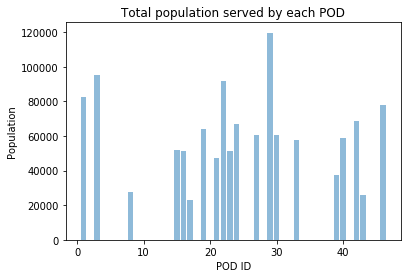

In [146]:
pods = pods.groupby("pod").population.sum().reset_index()

plt.bar(pods['pod'], pods['population'],align='center', alpha=0.5)
plt.ylabel('Population')
plt.xlabel('POD ID')
plt.title('Total population served by each POD')

plt.show()

### POD capacity

In [ ]:
# capacity_pod_all = [[N[j], i] for [j,i] in block_pod_list]

In [ ]:
# capacity_pod = {}
# for [N, i] in capacity_pod_all:
#     if i not in capacity_pod:
#         capacity_pod[i] = N
#     else:
#         capacity_pod[i] += N

In [ ]:
# max(capacity_pod.values())

In [ ]:
# min(capacity_pod.values())